# Real Estate Clean up

This is a real dataset, and it was downloaded using web scraping techniques. The data contains registers from **Fotocasa** which is one of the most popular real estate websites in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and in no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [21]:
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import folium 
from folium.plugins import MarkerCluster
def count_nan_zeros(df):
    nan_zeros = {}
    for col in df.columns:
        total_count = len(df[col])
        nan_count = df[col].isna().sum()
        zero_count = (df[col]==0).sum()
        unique_count = df[col].nunique()
        nan_zeros[col] = {
            "NaNs" : nan_count,
            "Zeros" : zero_count,
            "Uniques" : unique_count
        }
    return pd.DataFrame.from_dict(nan_zeros, orient = "index")

In [22]:
# This CSV file contains semicolons instead of comas as separator
df_raw = pd.read_csv('assets/real_estate.csv', sep=';')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

In [23]:
df_raw.sample(10, random_state=2025)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
11956,11957,153704529,False,habita mad,918007061.0,https://www.fotocasa.es/es/comprar/vivienda/gu...,3.0,1.0,72.0,214000,...,0,0,0,0,0,0,"40,46449","-3,63265",NaN,NaN
7285,7286,150530836,False,desarrollo de viviendas nueva ciudad,916358709.0,https://www.fotocasa.es/vivienda/alcala-de-hen...,3.0,2.0,112.0,243800,...,0,0,0,0,0,0,"40,23768","-3,77423",NaN,NaN
14035,14036,153921873,False,garsierra,912179623.0,https://www.fotocasa.es/es/comprar/vivienda/ti...,1.0,2.0,72.0,85000,...,0,0,0,0,0,1,"40,5506749","-3,3772946",NaN,NaN
10823,10824,150512853,False,covibarges,912175971.0,https://www.fotocasa.es/vivienda/arganda-del-r...,3.0,2.0,107.0,255000,...,0,0,0,0,0,1,"40,38219","-3,53069",NaN,NaN
5778,5779,148949209,False,urban,912780256.0,https://www.fotocasa.es/es/comprar/vivienda/pa...,4.0,4.0,NaN,439000,...,0,0,0,0,0,0,"40,39723","-3,99894",NaN,NaN
11905,11906,153945932,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,NaN,NaN,100.0,152250,...,0,0,0,0,0,1,"40,47349","-3,36515",NaN,NaN
3319,3320,152564823,False,aproperties,914890879.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,3.0,200.0,1320000,...,0,0,0,0,0,0,"40,42092","-3,69983",NaN,NaN
2345,2346,152424227,False,mr house,911369017.0,https://www.fotocasa.es/es/comprar/vivienda/pa...,2.0,2.0,81.0,149500,...,0,0,0,0,0,0,"40,2367357","-3,7684312",NaN,NaN
2453,2454,153258497,False,engel volkers madrid,910758015.0,https://www.fotocasa.es/es/comprar/vivienda/tr...,NaN,6.0,480.0,870000,...,0,0,0,0,0,0,"40,59254","-3,58344",NaN,NaN
3656,3657,153552213,False,villa gestiones inmobiliarias,NaN,https://www.fotocasa.es/es/comprar/vivienda/sa...,3.0,1.0,82.0,127500,...,0,0,0,0,0,0,"40,3955","-3,66676",NaN,NaN


In [24]:
count_nan_zeros(df_raw)

,NaNs,Zeros,Uniques
Unnamed: 0,0,0,15335
id_realEstates,0,0,14217
isNew,0,15198,2
realEstate_name,10,0,1821
phone_realEstate,794,0,1807
url_inmueble,0,0,493
rooms,353,0,17
bathrooms,345,0,14
surface,1250,0,728
price,0,60,2633


In [25]:
df_baking = df_raw.copy()
df_baking = df_baking.iloc[:,1:-2]
df_baking = df_baking.drop(['country','level1','level2'], axis = 1)
df_baking = df_baking.drop(['countryId','level1Id','level2Id','level3Id','level4Id'], axis = 1)
df_baking = df_baking.drop(['level5Id','level6Id','level7Id','level8Id'], axis = 1)
df_baking['latitude'] = df_baking['latitude'].apply(lambda x: float(x.replace(',','.')))
df_baking['longitude'] = df_baking['longitude'].apply(lambda x: float(x.replace(',','.')))
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_realEstates    15335 non-null  int64  
 1   isNew             15335 non-null  bool   
 2   realEstate_name   15325 non-null  object 
 3   phone_realEstate  14541 non-null  float64
 4   url_inmueble      15335 non-null  object 
 5   rooms             14982 non-null  float64
 6   bathrooms         14990 non-null  float64
 7   surface           14085 non-null  float64
 8   price             15335 non-null  int64  
 9   date              15335 non-null  object 
 10  description       15193 non-null  object 
 11  address           15335 non-null  object 
 12  level3            15335 non-null  object 
 13  level4            8692 non-null   object 
 14  level5            15335 non-null  object 
 15  level6            708 non-null    object 
 16  level7            13058 non-null  object

#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [26]:
# TODO
indice_maximo = df.loc[df["price"].idxmax()] 
address = indice_maximo["address"]
price = indice_maximo["price"]
print(f"The house located in {address} is the most expensive and its price is {price} USD")

The house located in El Escorial is the most expensive and its price is 8500000 USD


#### Exercise 02. Which is the cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [27]:
df_filter = df[df["price"]!=0]
indice_minimo = df_filter.loc[df_filter["price"].idxmin()] 
address = indice_minimo["address"]
price = indice_minimo["price"]
print(f"The house located in {address} is the cheapest and its price is {price} USD")

The house located in Berlin, Coslada is the cheapest and its price is 600 USD


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The biggest house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smallest house is located on County Road 1 N and its surface is 200 meters`

In [29]:
indice_maximo = df_filter.loc[df_filter['surface'].idxmax()]
address = indice_maximo["address"]
surface =  indice_maximo['surface']
print(f"The house located in {address_max} is the biggest and its surface is {surface_max} square meters")

indice_minimo = df_filter.loc[df_filter['surface'].idxmin()]
address = indice_minimo["address"]
surface =  indice_minimo['surface']
print(f"The house located in {address_min} is the smallest and its surface is {surface_min} square meters")

The house located in Sevilla la Nueva is the biggest and its surface is 249000.0 square meters
The house located in Calle Amparo,  Madrid Capital is the smallest and its surface is 15.0 square meters


In [6]:
# TODO
ds_filter = ds[ds["surface"]!=0]
indice_minimo = ds_filter.loc[ds_filter["surface"].idxmin()] 
address_min = indice_minimo["address"]
surface_min = indice_minimo["surface"]
print(f"The house located in {address_min} is the smallest and its surface is {surface_min} square meters")

indice_maximo = ds_filter.loc[ds_filter["surface"].idxmax()] 
address_max = indice_maximo["address"]
surface_max = indice_maximo["surface"]
print(f"The house located in {address_max} is the biggest and its surface is {surface_max} square meters")


The house located in Calle Amparo,  Madrid Capital is the smallest and its surface is 15.0 square meters
The house located in Sevilla la Nueva is the biggest and its surface is 249000.0 square meters


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the names of the populations with a comma as a separator. For example:

`> print(populations)`

`population1, population2, population3, ...`

In [30]:
# TODO
unique_populations = df["level5"].unique()
unique_populations_number = len(unique_populations)
print(f"The number of unique populations is {unique_populations_number}")

The number of unique populations is 168


In [31]:
populations = ', '.join(map(str, unique_populations))
print(populations)

Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín de Valdeiglesias, Navas del Rey, Busta

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`True` or `False`) followed by the rows/cols that contains NAs.

In [32]:
# TODO
ds.isnull().any(axis=0)

Unnamed: 0          False
id_realEstates      False
isNew               False
realEstate_name      True
phone_realEstate     True
url_inmueble        False
rooms                True
bathrooms            True
surface              True
price               False
date                False
description          True
address             False
country             False
level1              False
level2              False
level3              False
level4               True
level5              False
level6               True
level7               True
level8               True
upperLevel          False
countryId           False
level1Id            False
level2Id            False
level3Id            False
level4Id            False
level5Id            False
level6Id            False
level7Id            False
level8Id            False
accuracy            False
latitude            False
longitude           False
zipCode              True
customZone           True
dtype: bool

#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions.

In [33]:
df.dropna()

,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,...,level3,level4,level5,level6,level7,level8,upperLevel,accuracy,latitude,longitude


In [34]:

print(f"Final df:{df.shape}, original df: {df_raw.shape}")

Final df:(15335, 22), original df: (15335, 37)


#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value.

In [36]:
df[df["level5"]=="Arroyomolinos (Madrid)"]["price"].mean().round(1)

np.float64(294541.6)

#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

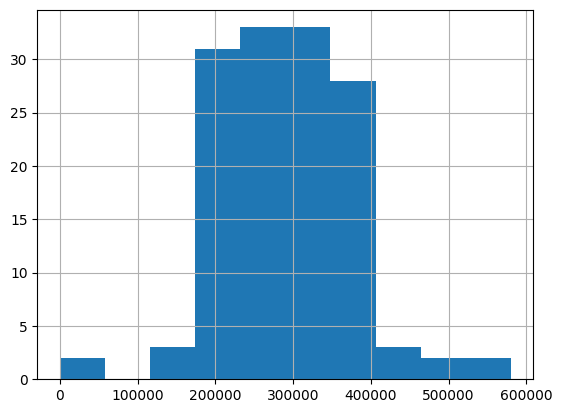

In [37]:
# TODO: Code
df[df["level5"]=="Arroyomolinos (Madrid)"]["price"].hist()
plt.show()

**TODO: Markdown**. 
- The concentration of data is distribuited between the range of 200000 and 400000
- The average tends to be around 300000, it can also be inferred that the mode ranges between 220000 and 320000
- The minimum value registered is 0 and the maximum value is around 580000
- There is no data between 60000 y around 110000 
- At a glance, the distribution looks simetric


#### Exercise 09. Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.

In [38]:
# TODO
df_filter = df[df["level5"].isin(["Valdemorillo", "Galapagar"])]
v_price = df[df["level5"]=="Valdemorillo"]["price"].mean().round(1)
g_price = df[df["level5"]=="Galapagar"]["price"].mean().round(1)
print(f"Valdemorillo:{v_price} > Galapagar: {g_price}")

Valdemorillo:363860.3 > Galapagar: 360063.2


#### Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [40]:
# TODO
(
    df_filter
    .assign(pps=df_filter["price"]/df_filter["surface"])
    .groupby("level5")["pps"].agg("mean")
)

level5
Galapagar       1606.324030
Valdemorillo    1317.950211
Name: pps, dtype: float64

- No, the average prices are not the same. The arverage price of Galapar is higher than the average price of Valdemorillo 

#### Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot`, then write a conclusion about it.

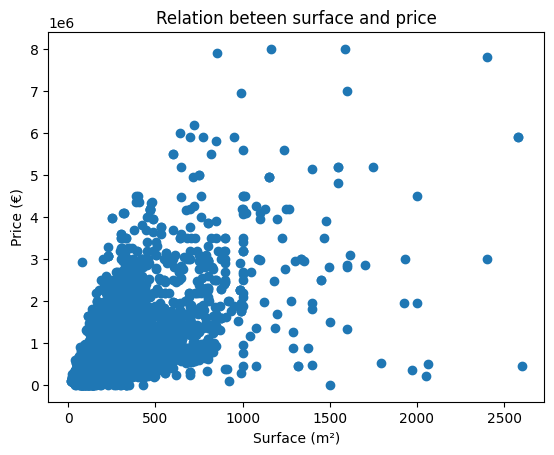

In [42]:
# TODO: Code
filter = df[df['surface']<3000]
plt.scatter(filter['surface'], filter['price'])
plt.title("Relation beteen surface and price")
plt.xlabel("Surface (m²)")
plt.ylabel('Price (€)')
plt.show()

#fig = px.scatter(df, x="surface", y= "price", title= "Relation beteen surface and price")
#fig.show()

### The highest density of houses are in the price range below 3 million euros with a surface area of ​​around a maximum of 750 square meters. ###

#### Exercise 12. How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.

In [49]:
# TODO
df['realEstate_name'].nunique()

1821

#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.

In [54]:
value_counts = df['level5'].value_counts()
max_value = value_counts.idxmax()
print(f"The population with the highest number of houses is'{max_value}' with a number of houses of {value_counts[max_value]}.")

The population with the highest number of houses is' Madrid Capital' with a number of houses of 6643.


#### Exercise 14. Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`.

In [55]:
# TODO
df_cs = df[df['level5'].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"])]
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 1 to 15325
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_realEstates    907 non-null    int64  
 1   isNew             907 non-null    bool   
 2   realEstate_name   907 non-null    object 
 3   phone_realEstate  854 non-null    float64
 4   url_inmueble      907 non-null    object 
 5   rooms             902 non-null    float64
 6   bathrooms         897 non-null    float64
 7   surface           787 non-null    float64
 8   price             907 non-null    int64  
 9   date              907 non-null    object 
 10  description       902 non-null    object 
 11  address           907 non-null    object 
 12  level3            907 non-null    object 
 13  level4            907 non-null    object 
 14  level5            907 non-null    object 
 15  level6            0 non-null      object 
 16  level7            907 non-null    object 
 17  

#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

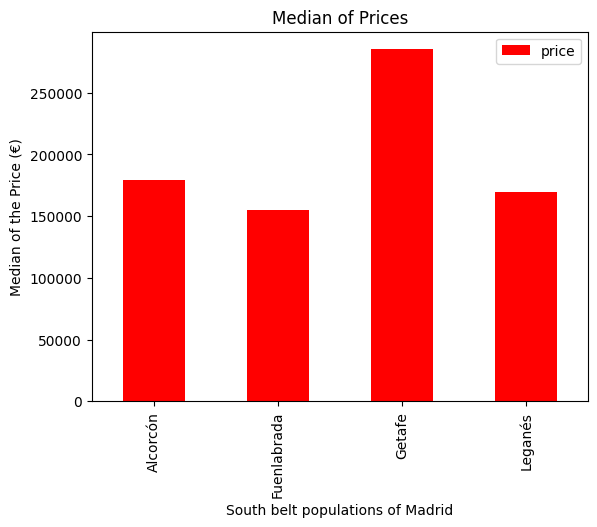

In [63]:
# TODO: Code
result = df_cs.groupby('level5')['price'].agg('median').to_frame()
colors = ['red']
result.plot(kind='bar', color=colors)
plt.title("Median of Prices")
plt.xlabel("South belt populations of Madrid")
plt.ylabel("Median of the Price (€)")
plt.show()

### The town with the highest prices is Getafe, reaching prices above 250,000 euros. The second highest is Alcorcón, compared to Fuenlabrada and Leganés, which have prices that can be considered similar. ###

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.

In [65]:
# TODO
result = df_cs[['price','rooms','surface','bathrooms']].describe().round(2).T
result.iloc[:,1:3]

,mean,std
price,223094.48,122153.05
rooms,3.02,0.85
surface,111.75,65.29
bathrooms,1.63,0.76


#### Exercise 17. What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.

In [66]:
# TODO
df_cs.groupby('level5')['price'].agg('max')

level5
Alcorcón        950000
Fuenlabrada     490000
Getafe         1050000
Leganés         650000
Name: price, dtype: int64

#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot.

Hint: You can help yourself by reviewing the *multihist* demo of Matplotlib.

In [67]:
# TODO
def min_max_normalize(df):
    min_price = df['price'].min()
    max_price = df['price'].max()
    df['norm'] = (df['price']- min_price)/ (max_price - min_price)
    return df
df_cs.groupby('level5').apply(min_max_normalize)

/tmp/ipykernel_988/2364238358.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_cs.groupby('level5').apply(min_max_normalize)


id_realEstates  isNew  \
level5                                  
Alcorcón 85          153152077  False   
         109         153586414  False   
         765         154002468   True   
         816         154001779   True   
         827         154001766   True   
...                        ...    ...   
Leganés  15015       153905987  False   
         15024       152450071  False   
         15238       153834575  False   
         15263       153903771  False   
         15291       151697757  False   

                                          realEstate_name  phone_realEstate  \
level5                                                                        
Alcorcón 85                       sinergical inmobiliaria               NaN   
         109              area uno asesores inmobiliarios       912664081.0   
         765                                         raul               NaN   
         816                                      deplace       910750918.0   
         827                 tecnocasa ciudad de alcorcon       911795412.0   
...                                                   ...               ...   
Leganés  15015                          outletdeviviendas       912172097.0   
         15024                    vivienda madrid leganes       911799348.0   
         15238                          tecnocasa leganes       912665579.0   
         15263  aliseda servicios de gestion inmobiliaria       911368198.0   
         15291                                    unipiso       912788631.0   

                                                     url_inmueble  rooms  \
level5                                                                     
Alcorcón 85     https://www.fotocasa.es/es/comprar/vivienda/le...    1.0   
         109    https://www.fotocasa.es/es/comprar/vivienda/ma...    3.0   
         765    https://www.fotocasa.es/es/comprar/vivienda/ma...    4.0   
         816    https://www.fotocasa.es/es/comprar/vivienda/la...    3.0   
         827    https://www.fotocasa.es/es/comprar/vivienda/la...    3.0   
...                                                           ...    ...   
Leganés  15015  https://www.fotocasa.es/vivienda/getafe/calle-...    2.0   
         15024  https://www.fotocasa.es/vivienda/getafe/calle-...    3.0   
         15238  https://www.fotocasa.es/es/comprar/vivienda/pa...    3.0   
         15263  https://www.fotocasa.es/es/comprar/vivienda/fu...    4.0   
         15291  https://www.fotocasa.es/es/comprar/vivienda/al...    3.0   

                bathrooms  surface   price                          date  ...  \
level5                                                                    ...   
Alcorcón 85           1.0     50.0  107000   2019-12-28T18:30:53.960102Z  ...   
         109          3.0    142.0  425000  2019-12-28T18:32:32.5337942Z  ...   
         765          2.0    109.0  248000          2019-12-28T17:10:00Z  ...   
         816          2.0     96.0  299000          2019-12-28T13:04:00Z  ...   
         827          1.0     65.0  119900          2019-12-28T12:59:00Z  ...   
...                   ...      ...     ...                           ...  ...   
Leganés  15015        1.0     74.0  114000          2019-12-18T05:07:00Z  ...   
         15024        2.0    102.0  259800          2019-12-18T05:00:00Z  ...   
         15238        1.0     72.0   89900          2019-12-17T19:26:00Z  ...   
         15263        3.0    249.0  390004          2019-12-17T19:02:00Z  ...   
         15291        2.0    110.0  279000          2019-12-17T18:57:00Z  ...   

                           level4    level5 level6  \
level5                                               
Alcorcón 85     Alcorcón, Zona de  Alcorcón    NaN   
         109    Alcorcón, Zona de  Alcorcón    NaN   
         765    Alcorcón, Zona de  Alcorcón    NaN   
         816    Alcorcón, Zona de  Alcorcón    NaN   
         827    Alcorcón, Zona de  Alcorcón    NaN   
...                           ...

/tmp/ipykernel_988/212934.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df_cs.groupby('level5').apply(min_max_normalize).reset_index(drop = True)


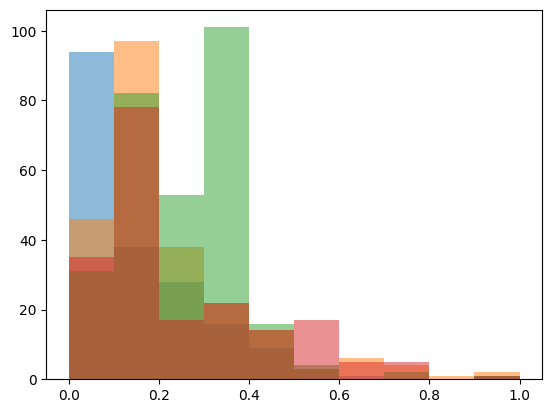

In [68]:
result = df_cs.groupby('level5').apply(min_max_normalize).reset_index(drop = True)
for city in result['level5'].unique():
    city_data = result[result['level5']==city]
    plt.hist(city_data['norm'], label=city, alpha=0.5)
plt.show()

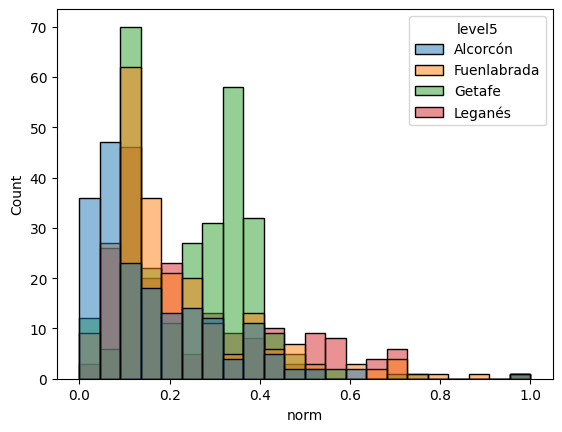

In [69]:
sns.histplot(data=result, x='norm', hue='level5')
plt.show()

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [70]:
# TODO
df_filter = df_cs[df_cs['level5'].isin(['Getafe','Alcorcón'])]
(
    df_filter
    .assign(pps=df_filter['price']/df_filter['surface'])
    .groupby('level5')['pps'].agg('mean').round(1)
)

print('Los precios medios de Alcorcón son mayores que los de Getafe')


Los precios medios de Alcorcón son mayores que los de Getafe


#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)
 
Hint: Make a scatter plot of each population using subplots.

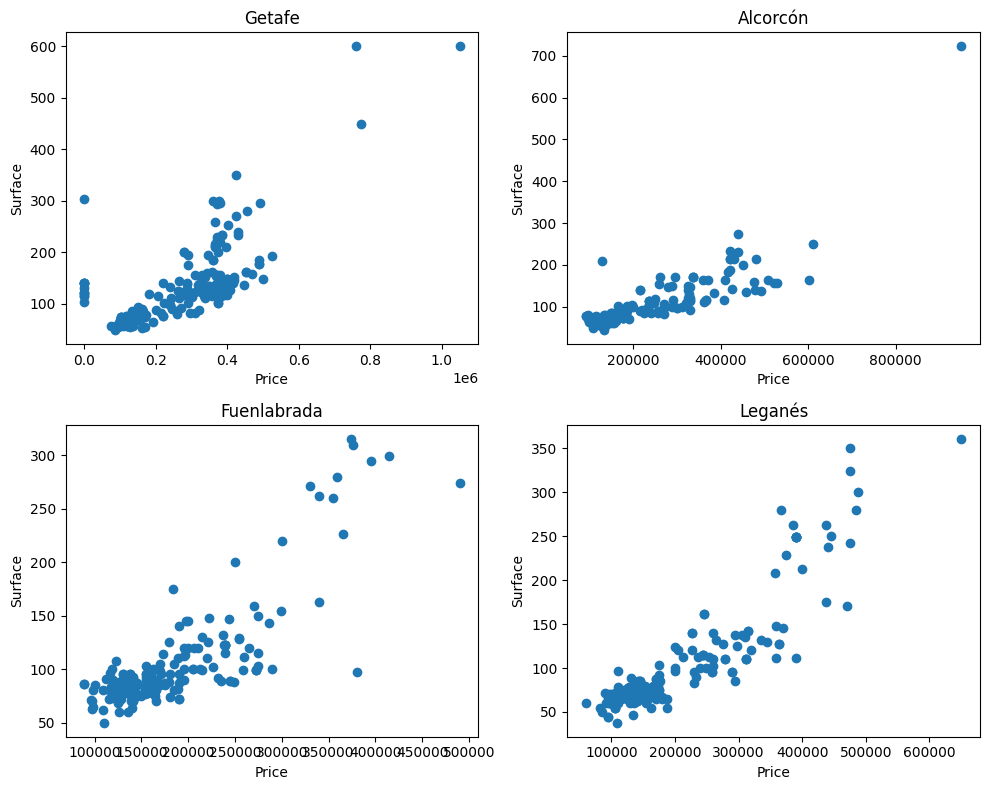

In [74]:
# TODO
# Crear una figura y un arreglo de subplots (2 filas, 2 columnas)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Primer subplot
axs[0, 0].scatter(df_cs[df_cs['level5'] == 'Getafe']['price'], df_cs[df_cs['level5'] == 'Getafe']['surface'])
axs[0, 0].set_title('Getafe')
axs[0, 0].set_xlabel('Price')
axs[0, 0].set_ylabel('Surface')

# Segundo subplot
axs[0, 1].scatter(df_cs[df_cs['level5'] == 'Alcorcón']['price'], df_cs[df_cs['level5'] == 'Alcorcón']['surface'])
axs[0, 1].set_title('Alcorcón')
axs[0, 1].set_xlabel('Price')
axs[0, 1].set_ylabel('Surface')

# Tercer subplot
axs[1, 0].scatter(df_cs[df_cs['level5'] == 'Fuenlabrada']['price'], df_cs[df_cs['level5'] == 'Fuenlabrada']['surface'])
axs[1, 0].set_title('Fuenlabrada')
axs[1, 0].set_xlabel('Price')
axs[1, 0].set_ylabel('Surface')

# Cuarto subplot
axs[1, 1].scatter(df_cs[df_cs['level5'] == 'Leganés']['price'], df_cs[df_cs['level5'] == 'Leganés']['surface'])
axs[1, 1].set_title('Leganés')
axs[1, 1].set_xlabel('Price')
axs[1, 1].set_ylabel('Surface')

# Ajustar el layout para que no se solapen los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

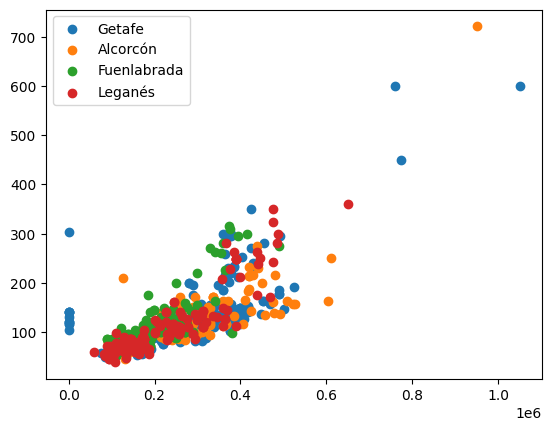

In [73]:
plt.scatter(df_cs[df_cs['level5']=='Getafe']['price'],df_cs[df_cs['level5']=='Getafe']['surface'])
plt.scatter(df_cs[df_cs['level5']=='Alcorcón']['price'],df_cs[df_cs['level5']=='Alcorcón']['surface'])
plt.scatter(df_cs[df_cs['level5']=='Fuenlabrada']['price'],df_cs[df_cs['level5']=='Fuenlabrada']['surface'])
plt.scatter(df_cs[df_cs['level5']=='Leganés']['price'],df_cs[df_cs['level5']=='Leganés']['surface'])
plt.legend(['Getafe','Alcorcón','Fuenlabrada','Leganés'])
plt.show()

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [75]:
map = folium.Map()
mc = MarkerCluster().add_to(map)
for i in range(len(df_cs)):
    lat = df_cs['latitude'].to_list()[i]
    lon = df_cs['longitude'].to_list()[i]
    folium.Marker(location = [lat, lon]).add_to(mc)
map